# `Bulldozer Price Prediction`

### Predicting the sale price of bulldozers using ml model.
1. problem definition:
    - how well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?
    - `https://www.kaggle.com/c/bluebook-for-bulldozers/overview`
2. data
    - the data is downloaded from the kaggle bluebook for bulldozers competitions.
    - There are three main datasets:
        - Train.csv
        - Valid.csv
        - Test.csv
3. features
    - data dictionary: `Data Dictionary.xlsx` file
4. model selection
5. evaluation
    - the evaluation metric for this competition is the `RMSLE` `(`root mean squared log error`)` between actual & predicted auction prices.
6. tunining
7. experimentation

### Explore data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.size

21872994

In [7]:
df.shape

(412698, 53)

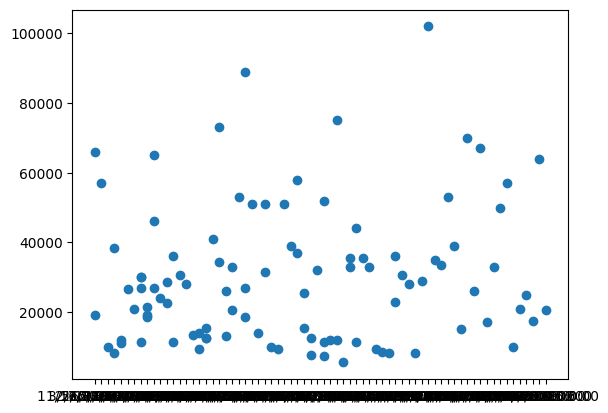

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:100], df["SalePrice"][:100]);

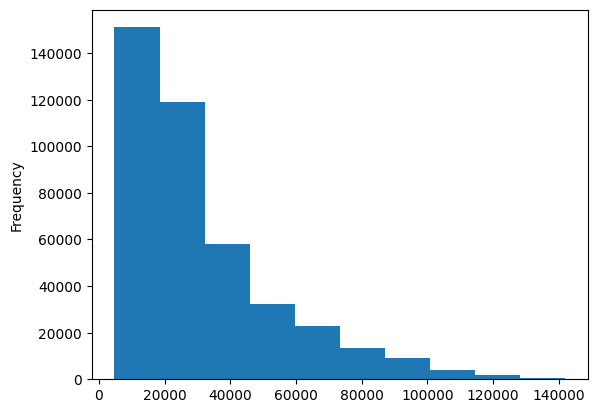

In [9]:
df.SalePrice.plot.hist();

### Parsing datas

When we work with time seried data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using `parse_dates` parameter.

In [10]:
# Import data again but this time parse dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"], )

In [11]:
df.saledate.dtype

dtype('<M8[ns]')

In [12]:
df.saledate[:7]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
Name: saledate, dtype: datetime64[ns]

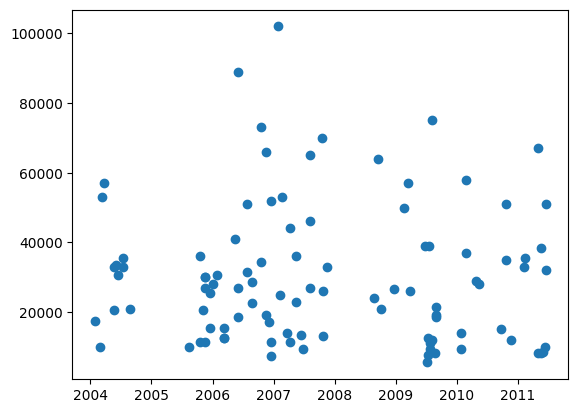

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:100], df["SalePrice"][:100]);

In [14]:
df.head().T # transpose to see all columns

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


#### Sort the DataFrame by saledate
- When working with time series data, its a good idea to sort it.

In [15]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(15)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
# Make a copy
# We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.
df_tmp = df.copy()

### `Feature Engineering`

In [17]:
# Add datetime parameters for `saledate` column
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [18]:
df_tmp.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
# now we've enriched our dataframe, we can drop saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

In [20]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

#### Lets do model driven `EDA` (Exploratory Data Analysis)

In [21]:
# Lets converts string to categories

# One way we can turn all of our data into numbers is by conveting them into pandas categories.

# find the columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [22]:
# Lets converts string to categories

# One way we can turn all of our data into numbers is by conveting them into pandas categories.

# find the columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [24]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [26]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
df_tmp.state.cat.codes # now we have way to access it as number

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [28]:
# lets check missing value ratio
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [29]:
# lets check missing value percentage
df_tmp.isnull().sum()/len(df_tmp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### save preprocessed data

In [30]:
# Export current tmp dataframe
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv", index=False)

In [31]:
# Import preprocessed data
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv", low_memory=False)

### Filling missing values

In [32]:
# fill numeric missing values
count = 0
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        count = count + 1
print(count)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
13


In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = content.fillna(content.median())

In [35]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [36]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
# fill categorical missing values and turning it into numbers
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = pd.Categorical(content).codes + 1 # to make all data positives


In [38]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = pd.Categorical(content).codes + 1 # to make all data positives

In [39]:
# Convert all object dtype columns to category codes
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

In [40]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

#### all data are now numeric and no missing values in df

## Now we need the `model` to `train` on the data

In [41]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=21) # random_state --> alternate of random.seed()

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 26min 1s
Wall time: 1min 35s


RandomForestRegressor(n_jobs=-1, random_state=21)

In [42]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9876271222613816

In [43]:
# lets split the data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)


(11573, 401125)

In [44]:
# Split the data into x and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 56), (401125,), (11573, 56), (11573,))

In [45]:
# creaet an evaluation function(RMSLE)
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores


In [46]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=21)

model.fit(X_train, y_train)

CPU times: total: 27min 2s
Wall time: 1min 34s


RandomForestRegressor(n_jobs=-1, random_state=21)

In [47]:
show_scores(model)

{'Training MAE': 1576.8371998254904,
 'Valid MAE': 6118.928417005098,
 'Training RMSLE': np.float64(0.08411694677597197),
 'Valid RMSLE': np.float64(0.2549994822177863),
 'Training R^2': 0.987597843538031,
 'Valid R^2': 0.8726321239932582}

![](abc.png)

### Hyperparmeter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different randomforest regressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 150, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2"]}
    
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=21), param_distributions=rf_grid, n_iter=20, cv=5, verbose=True)
# n_iter = 20, more the iter higher the probabillity of getting best_params_
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 14min 13s
Wall time: 55.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=21),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   verbose=True)

In [49]:
rs_model.best_params_

{'n_estimators': np.int64(20),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(19),
 'max_features': 'log2',
 'max_depth': 10}

In [50]:
show_scores(rs_model)

{'Training MAE': 8956.921530726366,
 'Valid MAE': 10318.975335173745,
 'Training RMSLE': np.float64(0.3938883673302466),
 'Valid RMSLE': np.float64(0.41002235558685407),
 'Training R^2': 0.6827351697101749,
 'Valid R^2': 0.6897720498487981}

![](abc2.png)

`https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard`

In [51]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=50, min_samples_leaf=1, min_samples_split=8, max_features=0.5, n_jobs=-1, random_state=21)

# fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 5min 48s
Wall time: 21.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=8, n_estimators=50,
                      n_jobs=-1, random_state=21)

In [52]:
show_scores(ideal_model)

{'Training MAE': 2382.4349663193057,
 'Valid MAE': 5971.352185244739,
 'Training RMSLE': np.float64(0.1204157458187244),
 'Valid RMSLE': np.float64(0.2472262351368982),
 'Training R^2': 0.9724761585394526,
 'Valid R^2': 0.8821036146944119}

### `⬆️⬆️more better Valid RMSLE Score ⬆️⬆️`

### Now lets make predictions on test data

In [53]:
# import the dataset
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

# df_test.head().T

In [56]:
def preprocess_data(df):
    """
    Performs transformations on df and returns the transformed df.
    Correctly handles all non-numeric columns.
    """

    # 1. Date Feature Engineering
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)

    # 2. Fill Numeric NaN values with the median
    # We do this first because categorical conversion will turn NaNs into a number (-1 or 0)
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

    # 3. Fill Categorical NaN values and Convert Categories to Numbers
    # Find all columns that are not numeric
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Turn categories into numbers and add +1
            # .astype('category').cat.codes handles strings and missing values automatically
            # Pandas assigns -1 to NaN, so +1 makes them 0.
            df[label] = pd.Categorical(content).codes + 1

    for label, content in df_tmp.items():
        if pd.api.types.is_object_dtype(content):
            df_tmp[label] = pd.Categorical(content).codes + 1

    return df

In [57]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131


In [58]:
df_test.dtypes

SalesID                       int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                  int64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                      int8
fiModelDesc                   int16
fiBaseModel                   int16
fiSecondaryDesc                int8
fiModelSeries                  int8
fiModelDescriptor              int8
ProductSize                    int8
fiProductClassDesc             int8
state                          int8
ProductGroup                   int8
ProductGroupDesc               int8
Drive_System                   int8
Enclosure                      int8
Forks                          int8
Pad_Type                       int8
Ride_Control                   int8
Stick                          int8
Transmission                   int8
Turbocharged                   int8
Blade_Extension                int8
Blade_Width                 

In [60]:
test_preds = ideal_model.predict(df_test)
test_preds

array([17086.03206597, 15838.87301587, 51258.16813742, ...,
       13783.2503552 , 19136.13311688, 26385.98329448])

In [61]:
# format predictions into the same format kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17086.032066
1,1227844,15838.873016
2,1227847,51258.168137
3,1227848,68709.610681
4,1227863,51670.156371
...,...,...
12452,6643171,40781.172716
12453,6643173,12695.889791
12454,6643184,13783.250355
12455,6643186,19136.133117


In [62]:
# Export prediction data
df_preds.to_csv("bluebook-for-bulldozers/test_predictions_by_Hemanta.csv", index=False)

## Features Importance

Features importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

In [63]:
ideal_model.feature_importances_

array([3.52597373e-02, 2.47877513e-02, 4.55500924e-02, 2.30192833e-03,
       4.12093580e-03, 1.93654937e-01, 3.69677057e-03, 1.27528988e-03,
       4.29510825e-02, 4.11255964e-02, 6.80734963e-02, 6.68164120e-03,
       1.70098509e-02, 1.54971822e-01, 4.75487247e-02, 7.54111677e-03,
       4.06879547e-03, 3.19471911e-03, 3.78164478e-03, 8.21961194e-02,
       5.19676761e-04, 1.73480984e-03, 1.27631580e-03, 1.51560702e-03,
       1.72204260e-03, 3.69337529e-05, 1.24811085e-03, 8.79628745e-03,
       4.16893293e-03, 4.54390177e-03, 5.70809502e-03, 4.29507335e-03,
       4.53563878e-03, 8.07609428e-04, 3.95242932e-03, 9.76156954e-03,
       1.29696472e-03, 2.62350999e-02, 4.90584056e-03, 7.48964562e-03,
       1.45069453e-03, 1.37531081e-03, 2.95383870e-03, 8.13932574e-04,
       6.80921404e-04, 5.33358363e-04, 6.70702616e-04, 3.62484815e-03,
       1.57979554e-03, 4.28552763e-04, 2.98315730e-04, 7.33629005e-02,
       4.76689041e-03, 7.57112024e-03, 3.87594817e-03, 1.16702324e-02])

In [68]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "features_importances": importances})
                       .sort_values("features_importances", ascending=False)
                       .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Featues Importance")
    ax.invert_yaxis()


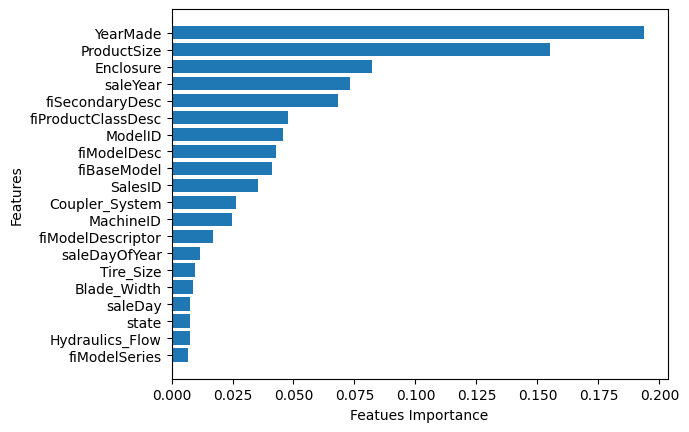

In [69]:
plot_features(X_train.columns, ideal_model.feature_importances_)